# Generar mapa distribución lluvia registrada en cuenca nivel 2

## Importar librerias

In [13]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pylab as plt
import seaborn as sns
import requests
import json

## Acceder a los datos de precipitación procesadas en Delft-FEWS para Cuencas Hidrográficas Nivel 2

**Importante** Se recomienda estar conectado a la VPN de Presidencia para acceder a travez de Servicio web 

In [14]:
# URL de acceso al servicio web de producción de FEWS-Uruguay
url_base = 'http://prodtec-fssaws:8080/FewsWebServices/rest/fewspiservice/v1/timeseries?'
headers = {'Accept':'application/json'}
# Parametros de busqueda para MAP en cuenca nivel 2
documentVersion='1.24'
documentFormat='PI_JSON'
filterid = 'CuencaNivel2'
parameterIds = 'P.cuenca'
moduleInstanceIds = 'PreprocessP'
# Fecha de inicio de busqueda y finalización. Importante brindar la fecha en UTC
startTime = '2023-03-20T10:00:00Z'
endTime = '2023-05-04T10:00:00Z'
# URL de busqueda de datos de MAP 
url = f"{url_base}filterId={filterid}&parameterIds={parameterIds}&moduleInstanceIds={moduleInstanceIds}&startTime={startTime}&endTime={endTime}&documentFormat={documentFormat}"

In [15]:
# Abrir consulta con parametros de busqueda
r = requests.get(url,headers=headers)
r.close()
# Debido a que la respuesta es en JSON entonces se convierte a formato JSON
data = json.loads(r.content.decode('utf-8'))

In [16]:
# Extrae los datos de MAP para cada cuenca hidrografica
df = pd.DataFrame()
for x in range(len(data['timeSeries'])):
    extraer_estacion = data['timeSeries'][x]['header']['locationId']
    datos_estacion = pd.DataFrame(data['timeSeries'][x]['events'])
    df[extraer_estacion] = datos_estacion['value'].values
# Une los datos de fecha y hora
datos_estacion = datos_estacion.drop(columns=['value','flag'])
datos_estacion = pd.to_datetime(datos_estacion['date'] + ' ' + datos_estacion['time'])
datos_estacion.to_frame()
# Une los datos con las fechas de serie de tiempo
df = pd.concat([datos_estacion, df],axis=1,join='inner')
df = df.rename(columns= {0: 'FECHA'})
# Convierte la hora de UTC a UTC-0300 (hora Montevideo)
df['FECHA'] = df['FECHA'] - pd.Timedelta(hours=3)
# df['FECHA'] = df['FECHA'] - pd.Timedelta(days=1)
df.set_index('FECHA')
df.sort_index(ascending=True)
display(df.tail(10))

,FECHA,10,11,12,13,14,15,16,17,18,...,58,60,61,62,63,64,65,66,67,68
36,2023-04-25 07:00:00,9.06,8.07,11.37,8.31,26.05,36.64,46.23,22.65,13.47,...,5.72,0.02,0.01,0.16,0.52,1.42,0.07,0.23,0.09,0.03
37,2023-04-26 07:00:00,0.03,0.05,0.63,5.09,4.88,8.05,4.16,11.66,4.44,...,5.04,6.47,2.8,1.88,1.84,1.09,4.06,2.56,2.01,0.36
38,2023-04-27 07:00:00,0.06,0,0.01,0.14,0.05,0.19,0.04,0.07,0.02,...,0.02,0.15,0.08,0.02,0.09,0.06,0.06,0.2,0.16,0.37
39,2023-04-28 07:00:00,0,0,0,0,0.01,0.02,0.32,0.19,0.08,...,0.01,0.04,0.01,0.02,0.07,0.15,0,0.19,0.13,0.2
40,2023-04-29 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0.12,0.38,0,0,0,0,0,0,0
41,2023-04-30 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0.01,0,0,0,0,0,0,0,0
42,2023-05-01 07:00:00,0.34,1.36,2.94,3.79,4.77,5.96,3.56,7,0.88,...,2.02,6.08,7.17,16.2,12.46,14.6,13.55,21.57,24.34,29.38
43,2023-05-02 07:00:00,21.17,3.07,4.32,6.1,0,4.93,0,2.12,0,...,0,0,0,0,0,0,0,0,0,0
44,2023-05-03 07:00:00,3.69,1.15,1.02,0.57,0.13,0.13,0,0.07,0,...,0,0,0.01,0,0,0,0,0.01,0.61,6.09
45,2023-05-04 07:00:00,0.75,1.16,0,0.11,0.64,0,0,0,0,...,0,0.03,0.01,0,0,0,0,0,0,0


In [17]:
cols = ['FECHA','63','67','28','52','45','42','40','31','33','32','30','12','13','44','10','15','27','29','24','22','26','20','58','55','54','57','50','43','17','23','65','21','61','64','68','66','62','60','53','51','41','14','11','16','19','18','56']
df = df[cols]


In [23]:
df.to_clipboard()

In [19]:
piv = pd.pivot_table(df,columns=["FECHA"])
piv[piv < 0] = np.NaN
display(piv.tail(10))

FECHA,2023-03-20 07:00:00,2023-03-21 07:00:00,2023-03-22 07:00:00,2023-03-23 07:00:00,2023-03-24 07:00:00,2023-03-25 07:00:00,2023-03-26 07:00:00,2023-03-27 07:00:00,2023-03-28 07:00:00,2023-03-29 07:00:00,...,2023-04-25 07:00:00,2023-04-26 07:00:00,2023-04-27 07:00:00,2023-04-28 07:00:00,2023-04-29 07:00:00,2023-04-30 07:00:00,2023-05-01 07:00:00,2023-05-02 07:00:00,2023-05-03 07:00:00,2023-05-04 07:00:00
58,0.26,11.71,10.59,0.20,0.00,30.44,11.07,0.00,0.0,0.0,...,5.72,5.04,0.02,0.01,0.00,0.00,2.02,0.0,0.00,0.00
60,9.15,1.90,0.00,0.84,0.22,0.92,40.47,0.03,0.0,0.0,...,0.02,6.47,0.15,0.04,0.12,0.01,6.08,0.0,0.00,0.03
61,15.35,3.83,0.00,0.07,0.14,6.39,57.44,0.04,0.0,0.0,...,0.01,2.80,0.08,0.01,0.38,0.00,7.17,0.0,0.01,0.01
62,23.33,2.46,0.00,0.00,0.00,2.99,30.43,0.00,0.0,0.0,...,0.16,1.88,0.02,0.02,0.00,0.00,16.20,0.0,0.00,0.00
63,18.60,4.52,0.00,0.69,0.33,0.02,14.21,0.02,0.0,0.0,...,0.52,1.84,0.09,0.07,0.00,0.00,12.46,0.0,0.00,0.00
64,28.67,0.31,0.00,0.00,0.00,0.14,16.27,0.00,0.0,0.0,...,1.42,1.09,0.06,0.15,0.00,0.00,14.60,0.0,0.00,0.00
65,11.52,1.01,0.00,0.00,0.00,6.45,28.08,0.00,0.0,0.0,...,0.07,4.06,0.06,0.00,0.00,0.00,13.55,0.0,0.00,0.00
66,10.13,0.43,0.00,0.00,0.00,0.11,7.83,0.00,0.0,0.0,...,0.23,2.56,0.20,0.19,0.00,0.00,21.57,0.0,0.01,0.00
67,21.29,2.45,0.00,0.00,0.00,0.00,8.05,0.02,0.0,0.0,...,0.09,2.01,0.16,0.13,0.00,0.00,24.34,0.0,0.61,0.00
68,34.27,0.01,0.00,0.00,0.00,0.00,9.46,0.00,0.0,0.0,...,0.03,0.36,0.37,0.20,0.00,0.00,29.38,0.0,6.09,0.00


In [20]:
piv2 = piv.transpose()

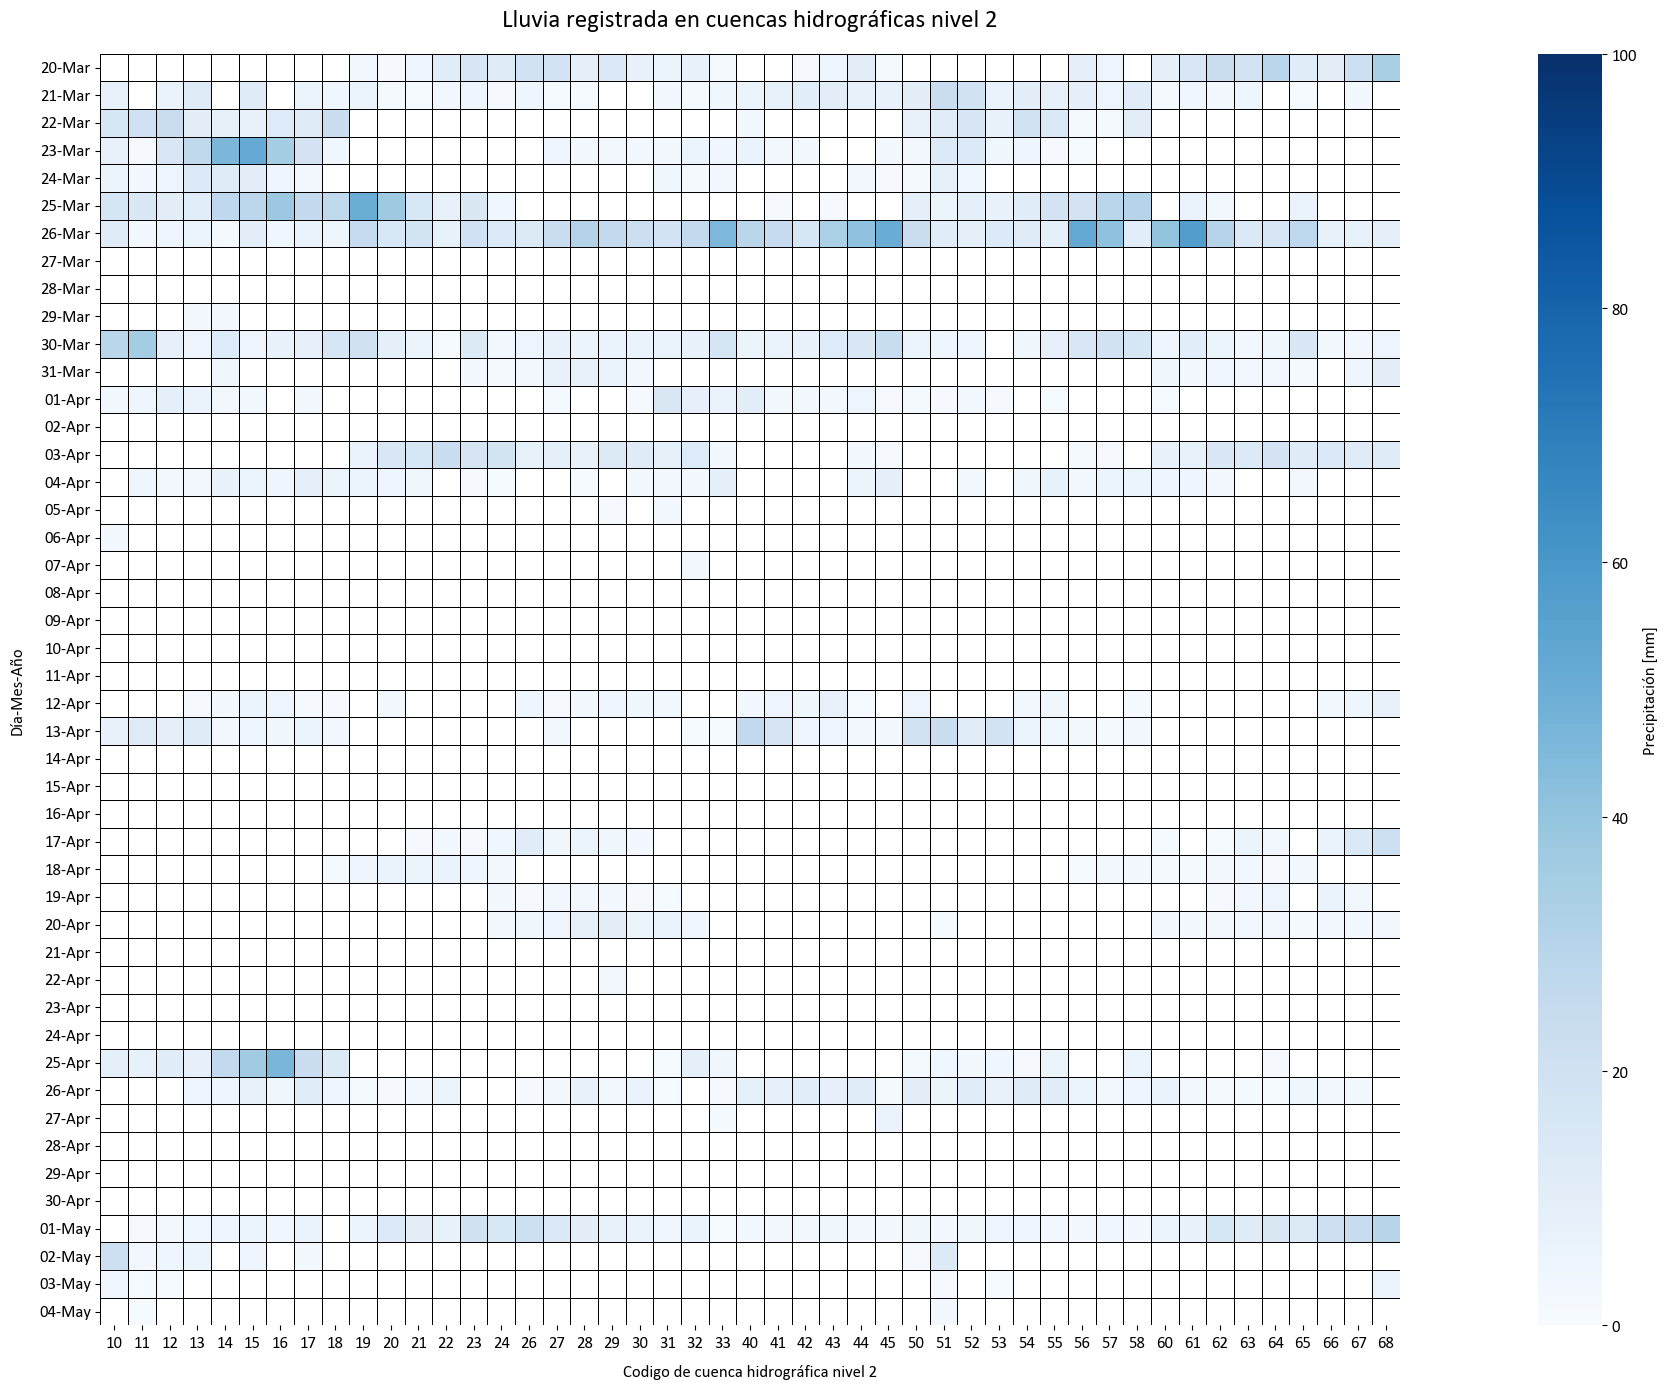

In [21]:
from cProfile import label
from matplotlib.pyplot import axis
from numpy import size, sort
import matplotlib
from matplotlib import pyplot as plt

font_size = 12
fig, ax = plt.subplots(figsize=(28,14))

values = piv2.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
cmap = "Blues"
# cmap = "YlGnBu"

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv2,square=True,cmap=cmap,annot=False,vmin=0, vmax=100,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 1,ax=ax)

ax.set_title('Lluvia registrada en cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

ax.set_ylabel('Día-Mes-Año',rotation=90, labelpad=10,size=font_size)
ax.set_yticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_xlabel('Codigo de cuenca hidrográfica nivel 2', rotation=0, labelpad=10, fontsize=font_size)
ax.tick_params(axis='x', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
# plt.savefig('final.png', dpi=1000, bbox_inches='tight')

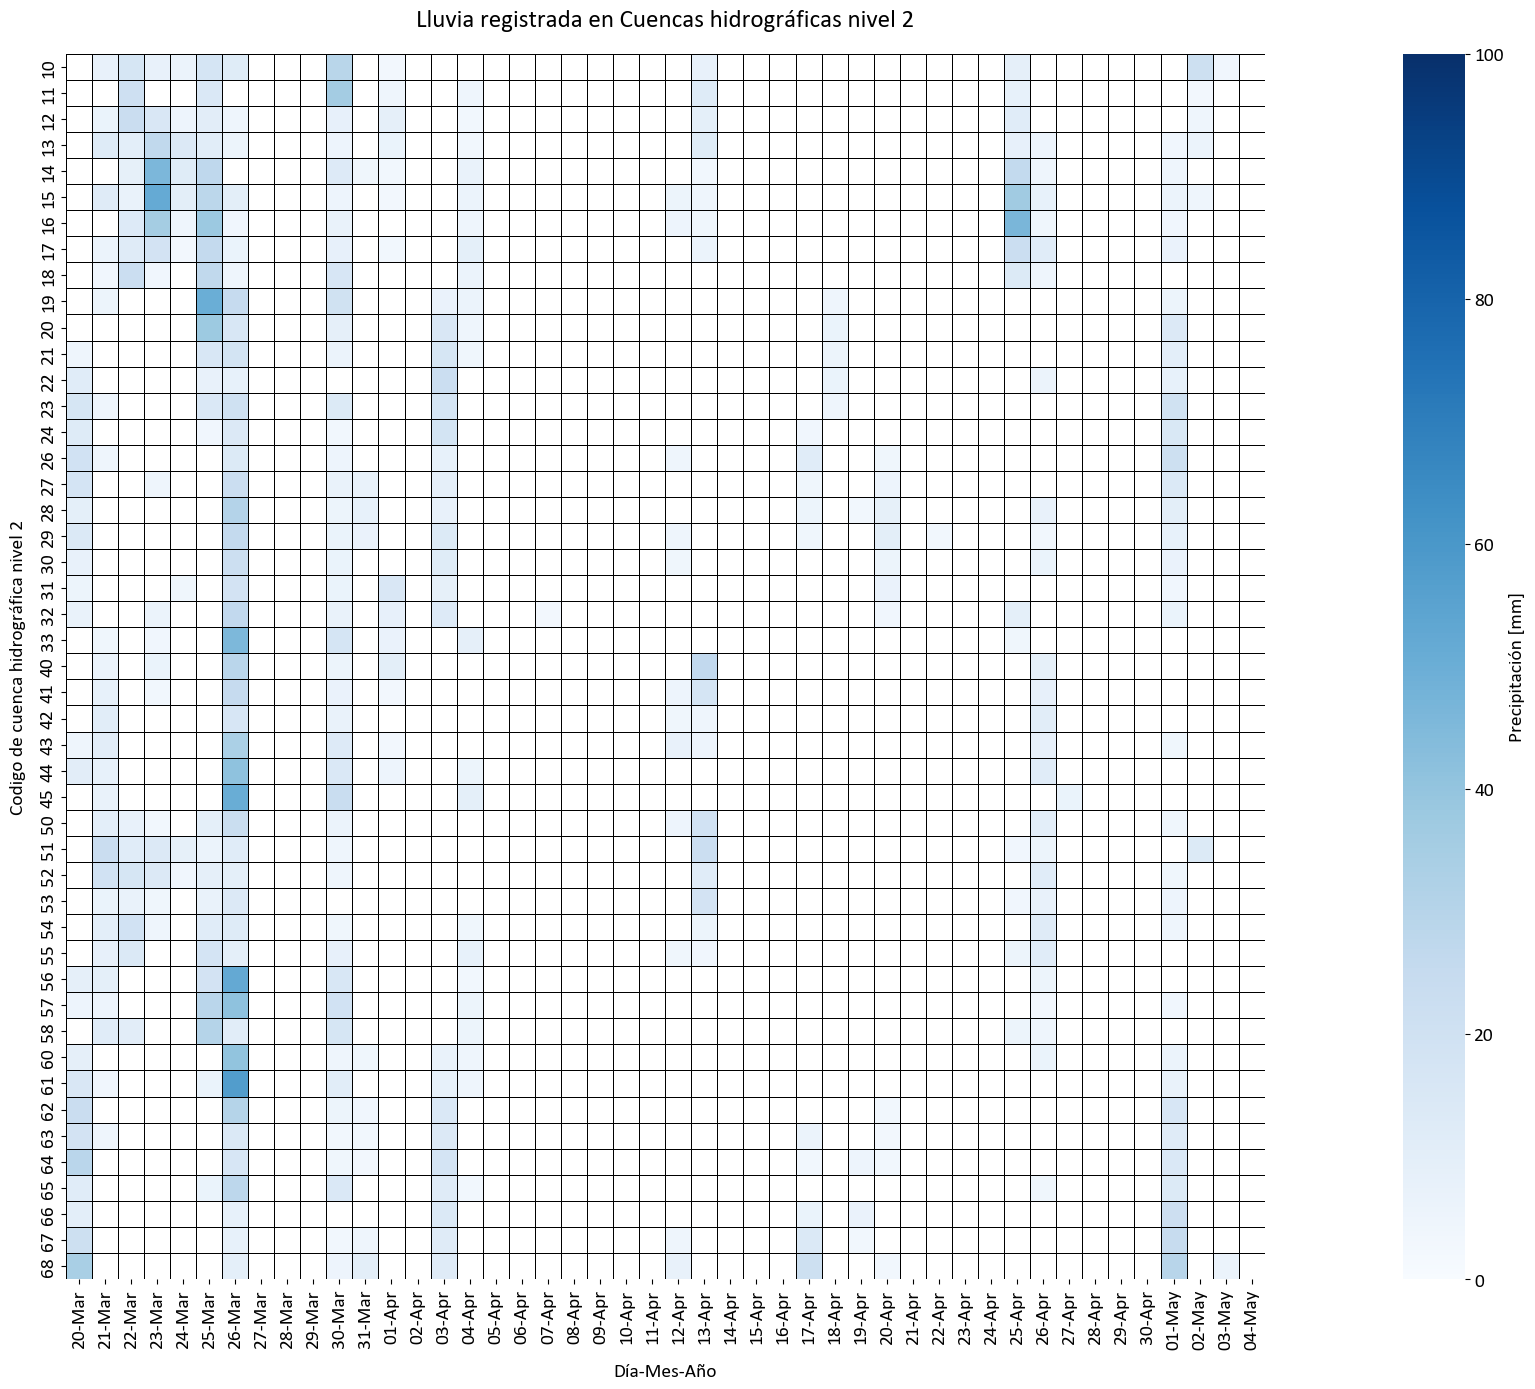

In [22]:
fig, ax = plt.subplots(figsize=(28,14))

values = piv.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

font_size = 14

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv,square=True,cmap="Blues",vmin=0, vmax=100,annot = False,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 3,ax=ax)

ax.set_title('Lluvia registrada en Cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

ax.set_xlabel('Día-Mes-Año',rotation=0, labelpad=10,size=font_size)
ax.set_xticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_ylabel('Codigo de cuenca hidrográfica nivel 2', rotation=90, labelpad=10, fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
# plt.savefig('final2.png', dpi=1000, bbox_inches='tight')